In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/prodramp/publiccode/master/datasets/titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Text(0.5, 1.0, 'Cardinality')

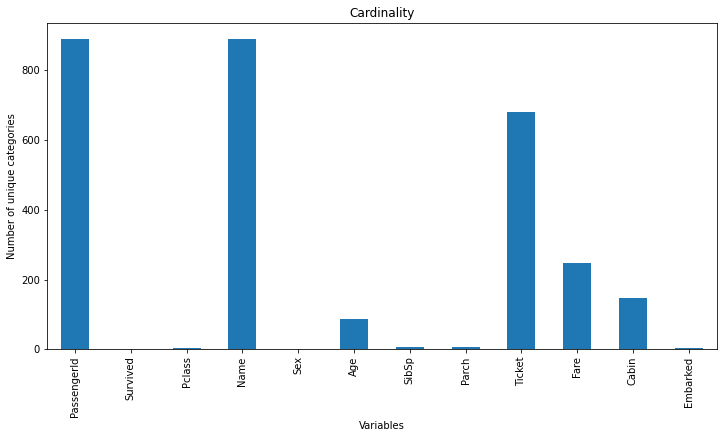

In [7]:
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

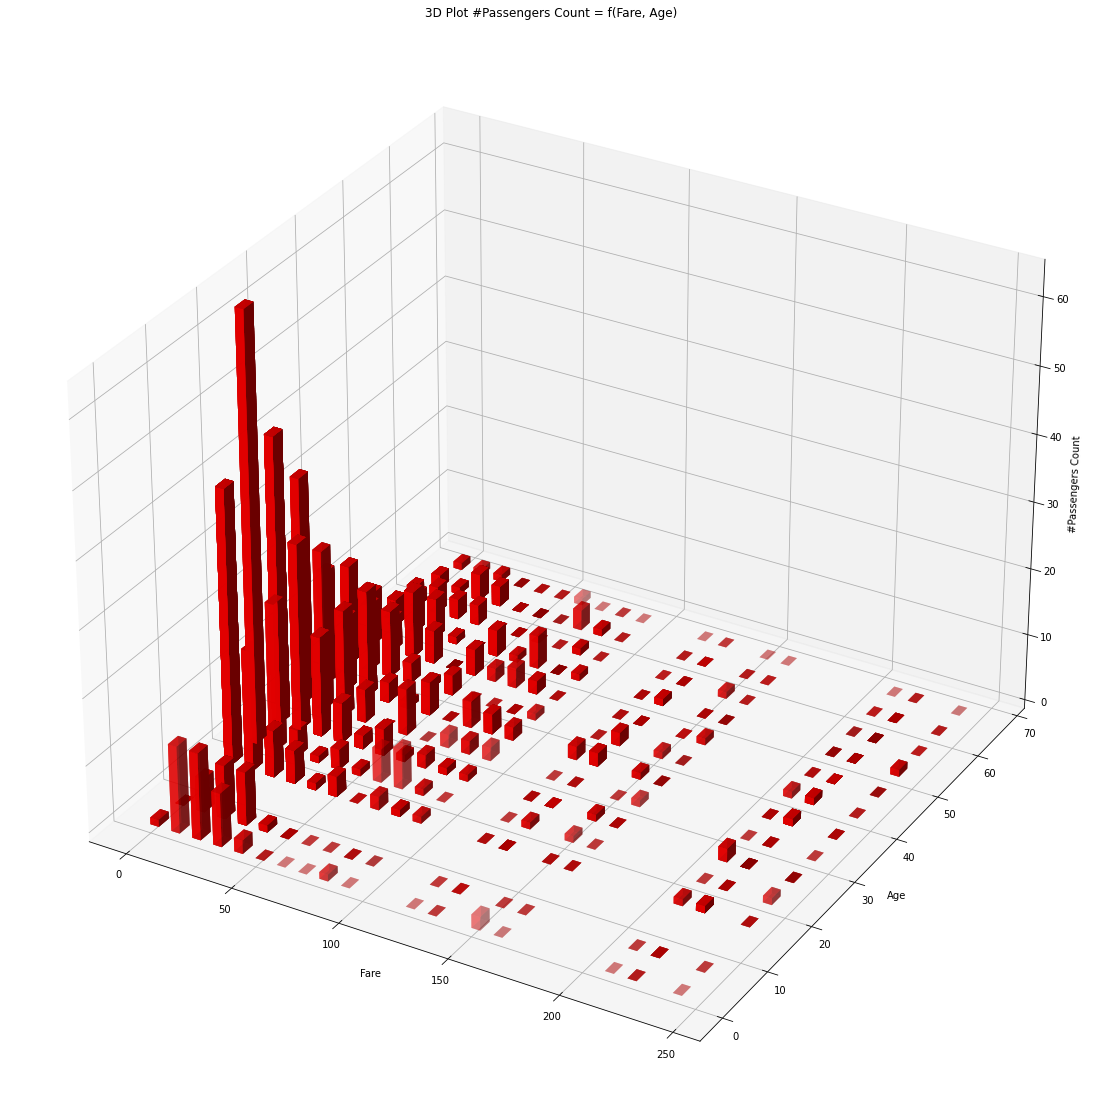

In [8]:
# source - https://www.kaggle.com/tdesfont/matplotlib-visualisations-for-titanic
sub_df = df[['Age', 'Fare', 'Survived']].dropna()
sub_df['Age'] = sub_df['Age'].map(lambda x: 5*(x//5))
sub_df['Fare'] = sub_df['Fare'].map(lambda x: 10*(x//10))

dictionnaire = sub_df.groupby(['Fare', 'Age'])['Survived'].count().to_dict()

def get_count(i, j, dictionnaire):
    if (i,j) in list(dictionnaire.keys()):
        # (i,j) is a key
        return dictionnaire[(i,j)]
    else:
        return 0

from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(111, projection='3d')
_x = np.array([i[0] for i in list(dictionnaire.keys())])
_y = np.array([i[1] for i in list(dictionnaire.keys())])

np.random.shuffle(_x)
np.random.shuffle(_y)

_x = _x[:40]
_y = _y[:40]

_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = np.array([get_count(i, j, dictionnaire) for i, j in zip(x, y)])
bottom = np.zeros_like(top)
width = 4
depth = 2

ax.bar3d(x, y, bottom, width, depth, top, alpha=0.3, color='red')

ax.set_title('3D Plot #Passengers Count = f(Fare, Age)')
ax.set_xlabel('Fare')
ax.set_ylabel('Age')
ax.set_zlabel('#Passengers Count')

plt.show()

In [14]:
def generate_3d_plot(dataFrame, col1, col2, col3, heading, color):
    sub_df = dataFrame[[col1,col2, col3]].dropna()
    sub_df[col1] = sub_df[col1].map(lambda x: 5*(x//5))
    sub_df[col2] = sub_df[col2].map(lambda x: 10*(x//10))

    dictionnaire = sub_df.groupby([col2, col1])[col3].count().to_dict()

    def get_count(i, j, dictionnaire):
        if (i,j) in list(dictionnaire.keys()):
            # (i,j) is a key
            return dictionnaire[(i,j)]
        else:
            return 0

    from mpl_toolkits.mplot3d import Axes3D

    # setup the figure and axes
    fig = plt.figure(figsize=(20, 20))

    ax = fig.add_subplot(111, projection='3d')
    _x = np.array([i[0] for i in list(dictionnaire.keys())])
    _y = np.array([i[1] for i in list(dictionnaire.keys())])

    np.random.shuffle(_x)
    np.random.shuffle(_y)

    _x = _x[:40]
    _y = _y[:40]

    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    top = np.array([get_count(i, j, dictionnaire) for i, j in zip(x, y)])
    bottom = np.zeros_like(top)
    width = 3
    depth = 2 # 1..5 wider 3D vars
    
    ax.bar3d(x, y, bottom, width, depth, top, alpha=0.3, color=color)

    ax.set_title('3D Plot ' + heading + ' = f(' + col2 + ', ' +  col1 +' )')
    ax.set_xlabel(col2)
    ax.set_ylabel(col1)
    ax.set_zlabel(col3)

    plt.show()

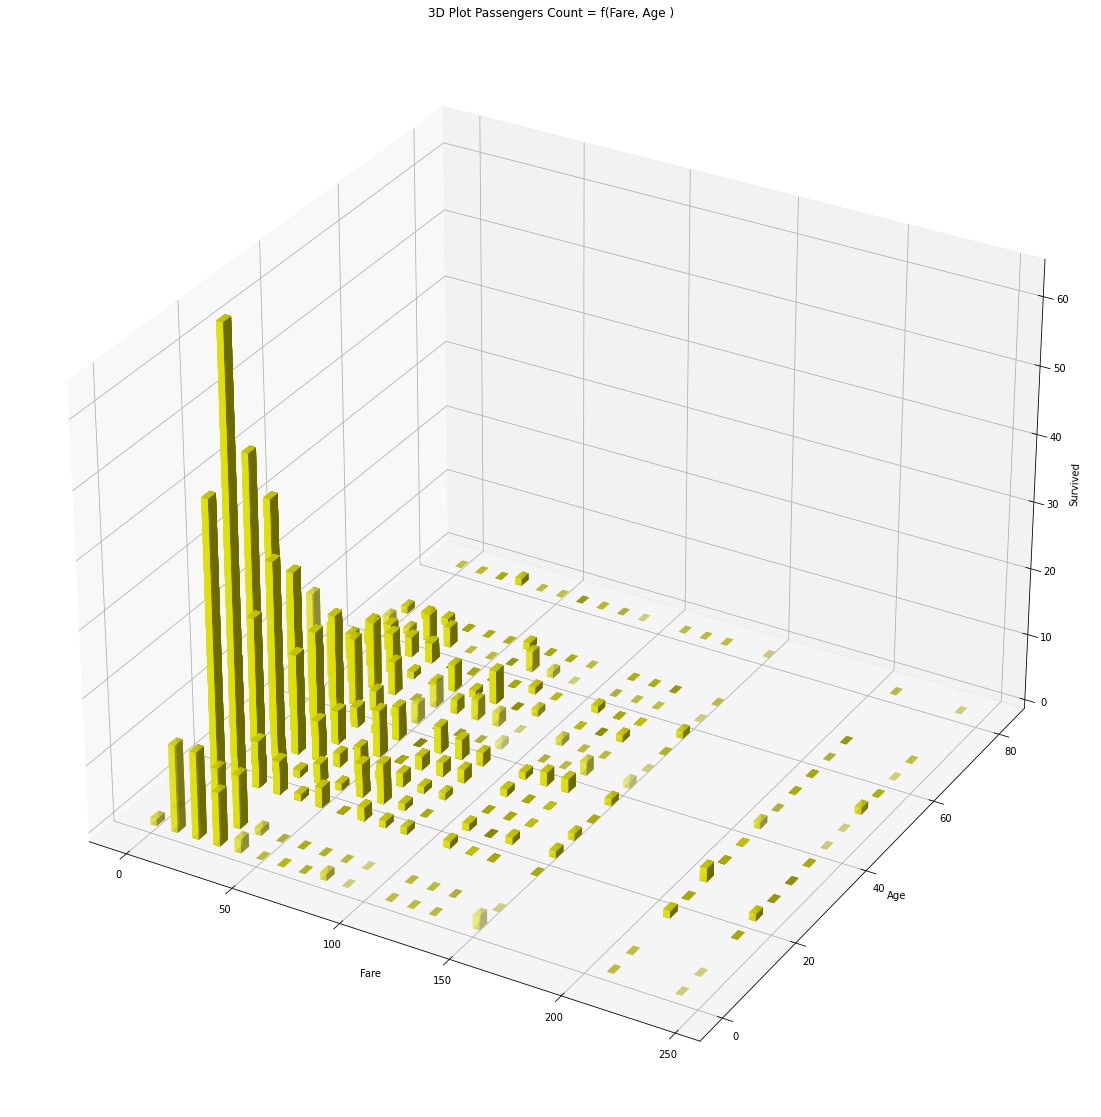

In [15]:
generate_3d_plot(df, 'Age', 'Fare', 'Survived', 'Passengers Count', 'yellow')

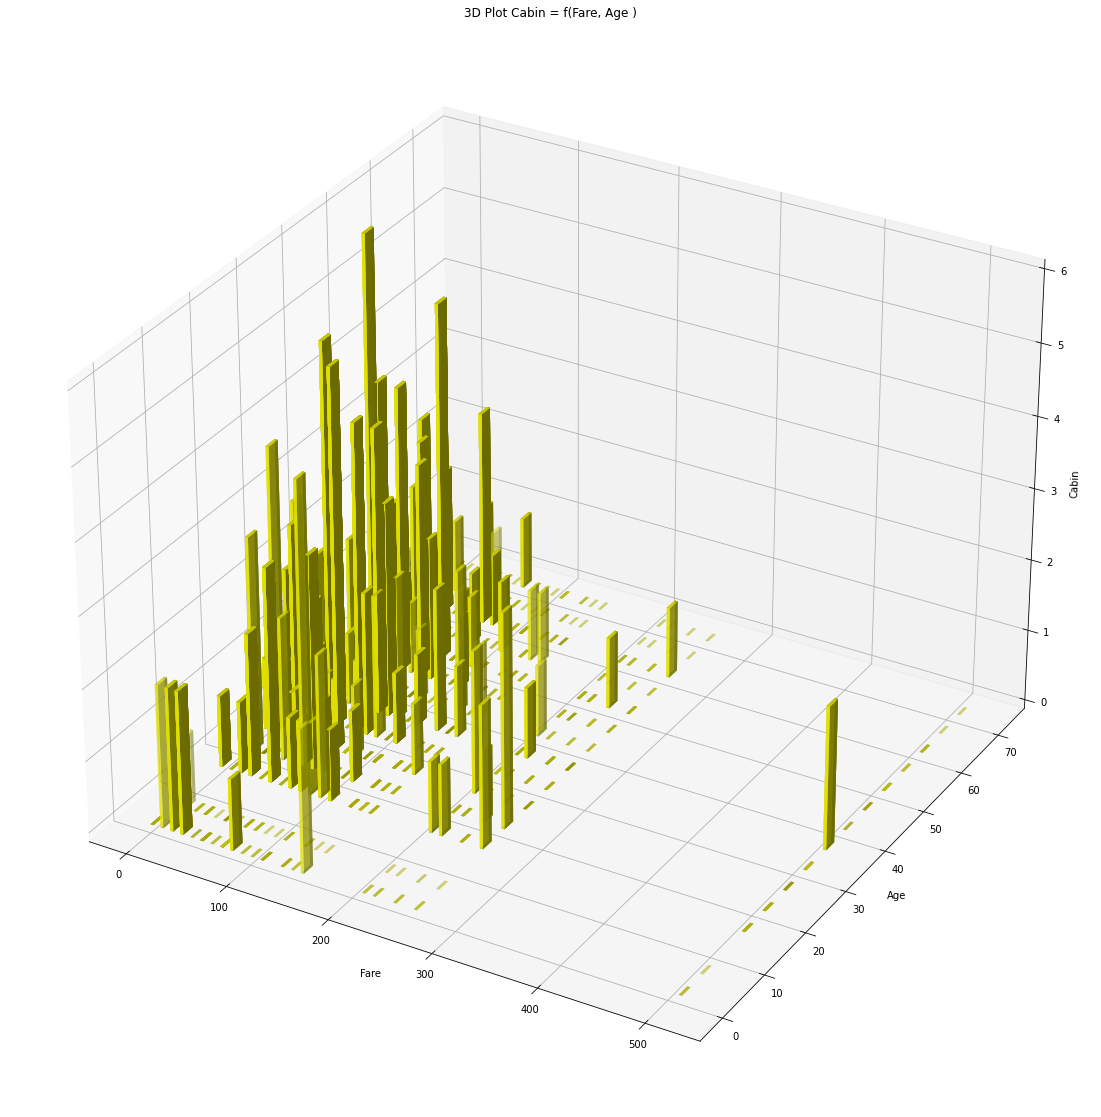

In [13]:
generate_3d_plot(df, 'Age', 'Fare', 'Cabin', 'Cabin', 'yellow')

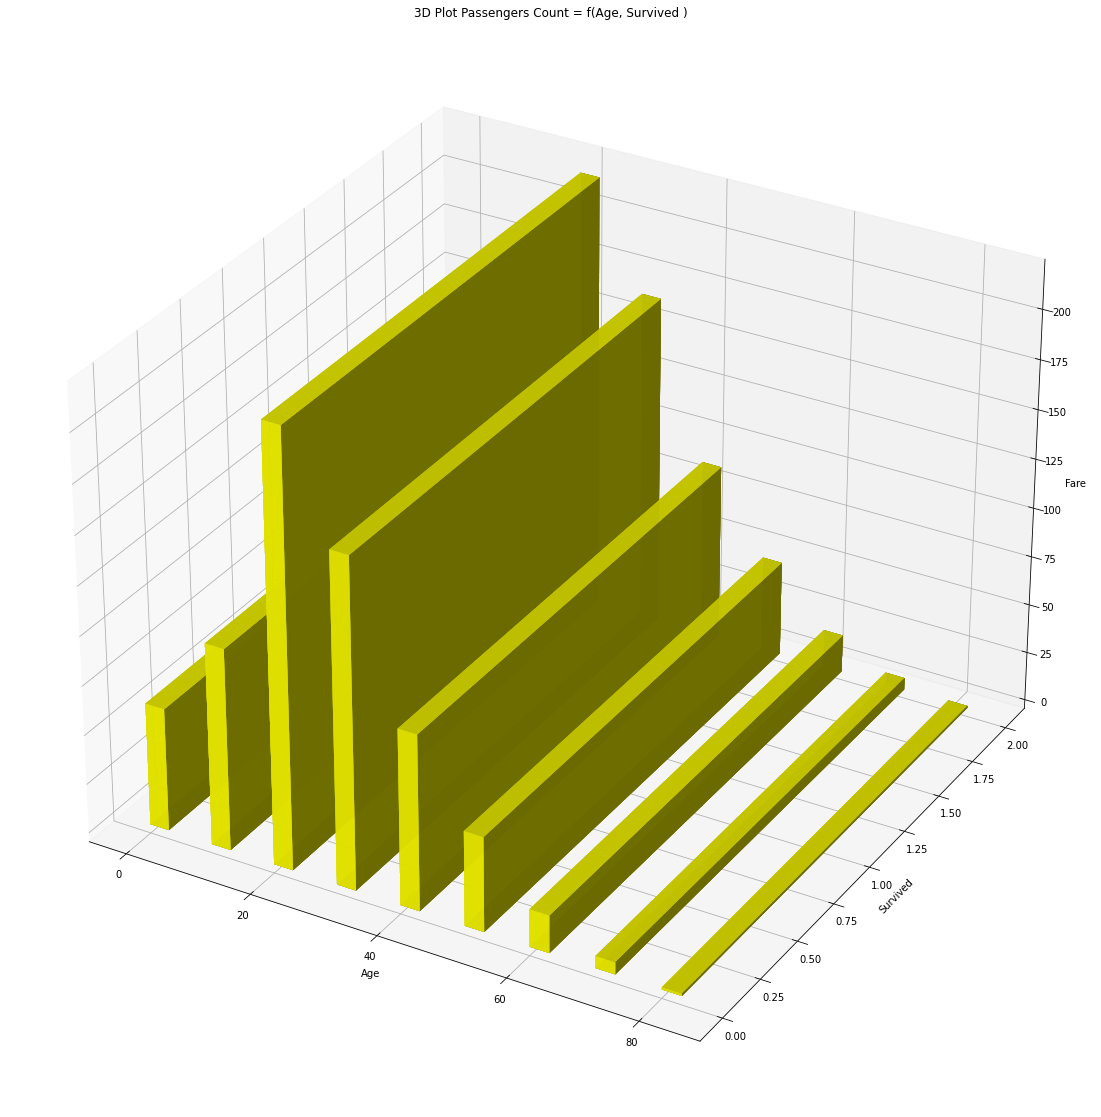

In [16]:
generate_3d_plot(df,  'Survived', 'Age','Fare',  'Passengers Count', 'yellow')